<a href="https://colab.research.google.com/github/sipocz/pid_time_series/blob/main/PID_Autoencoder_error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [368]:
import pandas as pd
import os
import seaborn as sns

In [369]:
from google.colab import drive

In [370]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [371]:
user = "SL"
#user = "SL"
uzem = "Szint1"
data_source="5"
#fname="72C03_TC_error_toNN.csv"
fname_good = "415_SC_error_part1.csv"
fname_bad = "415_SC_error_part2.csv"

In [372]:
# Elérési út a 415_SC_error-hoz
if user=="Anna":
    path_good = "/content/drive/MyDrive/Egyetem_MSc/Diplomamunka/2022Anna/Datapipeline/" + data_source + "/" + fname_good
    path_bad = "/content/drive/MyDrive/Egyetem_MSc/Diplomamunka/2022Anna/Datapipeline/" + data_source + "/" + fname_bad
    path_fig = "/content/drive/MyDrive/Egyetem_MSc/Diplomamunka/2022Anna/Datapipeline/plots/"
else:
    path_good = "/content/drive/MyDrive/2022Anna/Datapipeline/" + data_source + "/" + fname_good
    path_bad = "/content/drive/MyDrive/2022Anna/Datapipeline/" + data_source + "/" + fname_bad
    path_fig = "/content/drive/MyDrive/2022Anna/Datapipeline/plots/"


In [373]:
print(path_good)
print(path_bad)

/content/drive/MyDrive/2022Anna/Datapipeline/5/415_SC_error_part1.csv
/content/drive/MyDrive/2022Anna/Datapipeline/5/415_SC_error_part2.csv


In [374]:
df = pd.read_csv(path_good,usecols=None)
df_bad = pd.read_csv(path_bad,usecols=None)

In [375]:
print(df.isnull().values.any())
print(df_bad.isnull().values.any())

False
False


In [376]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-54.810024,-80.342186,-60.770203,-41.081482,-21.779583,-3.823530,-0.806820,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875
1,-80.342186,-60.770203,-41.081482,-21.779583,-3.823530,-0.806820,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875
2,-60.770203,-41.081482,-21.779583,-3.823530,-0.806820,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875
3,-41.081482,-21.779583,-3.823530,-0.806820,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875
4,-21.779583,-3.823530,-0.806820,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875


In [377]:
df.mean()

0     0.026810
1     0.078824
2     0.154971
3     0.212618
4     0.251656
5     0.272451
6     0.276273
7     0.277245
8     0.277245
9     0.277245
10    0.277245
11    0.277245
12    0.277245
13    0.277245
14    0.277245
15    0.277245
16    0.277245
17    0.277245
18    0.277245
19    0.277245
dtype: float64

In [378]:
from sklearn.decomposition import PCA

import matplotlib.pyplot as plot

df_ = df

# You must normalize the data before applying the fit method
df_normalized=(df_ - df_.mean()) / df_.std()

# Normalize bad data with the good data parameters
df_bad_normalized=(df_bad - df_.mean()) / df_.std()

In [379]:
df_normalized.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,1.058000e+03,1.058000e+03,1.058000e+03,1.058000e+03,1.058000e+03,1058.000000,1.058000e+03,1.058000e+03,1.058000e+03,1.058000e+03,1.058000e+03,1.058000e+03,1.058000e+03,1058.000000,1.058000e+03,1058.000000,1.058000e+03,1058.000000,1.058000e+03,1.058000e+03
mean,2.014771e-17,1.343181e-17,-6.715905e-18,-2.686362e-17,2.014771e-17,0.000000,-6.715905e-18,6.715905e-18,6.715905e-18,6.715905e-18,6.715905e-18,6.715905e-18,2.014771e-17,0.000000,1.343181e-17,0.000000,-6.715905e-18,0.000000,6.715905e-18,-6.715905e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00
min,-1.565455e+01,-1.658627e+01,-1.461205e+01,-1.515439e+01,-1.613305e+01,-16.450433,-1.646263e+01,-1.646369e+01,-1.646369e+01,-1.646369e+01,-1.646369e+01,-1.646369e+01,-1.646369e+01,-16.463692,-1.646369e+01,-16.463692,-1.646369e+01,-16.463692,-1.646369e+01,-1.646369e+01
25%,3.192111e-02,2.351352e-02,9.321129e-03,-4.236052e-03,-1.565795e-02,-0.022015,-2.314340e-02,-2.342752e-02,-2.342752e-02,-2.342752e-02,-2.342752e-02,-2.342752e-02,-2.342752e-02,-0.023428,-2.342752e-02,-0.023428,-2.342752e-02,-0.023428,-2.342752e-02,-2.342752e-02
50%,3.757694e-02,2.906014e-02,1.553080e-02,1.908687e-03,-9.120910e-03,-0.015352,-1.647571e-02,-1.675952e-02,-1.675952e-02,-1.675952e-02,-1.675952e-02,-1.675952e-02,-1.675952e-02,-0.016760,-1.675952e-02,-0.016760,-1.675952e-02,-0.016760,-1.675952e-02,-1.675952e-02
75%,4.203518e-02,3.378066e-02,2.102021e-02,8.054450e-03,-2.582778e-03,-0.008687,-9.806922e-03,-1.009041e-02,-1.009041e-02,-1.009041e-02,-1.009041e-02,-1.009041e-02,-1.009041e-02,-0.010090,-1.009041e-02,-0.010090,-1.009041e-02,-0.010090,-1.009041e-02,-1.009041e-02
max,8.806621e+00,9.314006e+00,1.081282e+01,1.209019e+01,1.285093e+01,13.092863,1.310057e+01,1.310091e+01,1.310091e+01,1.310091e+01,1.310091e+01,1.310091e+01,1.310091e+01,13.100907,1.310091e+01,13.100907,1.310091e+01,13.100907,1.310091e+01,1.310091e+01


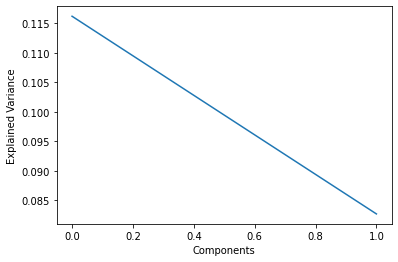

In [380]:


pca = PCA(n_components=2)
data=pca.fit_transform(df_normalized)

#data_bad = pca.transform(df_bad_normalized)

pca.components_

plot.plot(pca.explained_variance_ratio_)
plot.ylabel('Explained Variance')
plot.xlabel('Components')
plot.show()

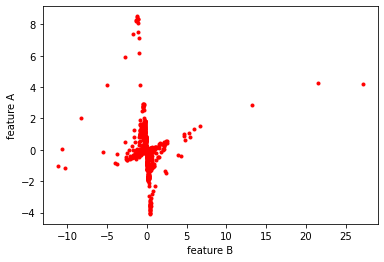

In [381]:
plot.scatter(data[:,0],data[:,1],c="r",marker=".")
plot.ylabel('feature A')
plot.xlabel('feature B')
#plot.savefig(path_fig+"good_data_plot.pdf")
plot.show()

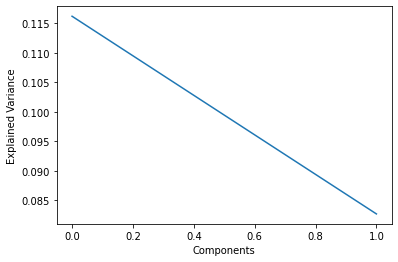

In [382]:

#pca = PCA(n_components=2)
#data=pca.fit_transform(df_normalized)

data_bad = pca.transform(df_bad_normalized)

pca.components_

plot.plot(pca.explained_variance_ratio_)
plot.ylabel('Explained Variance')
plot.xlabel('Components')
plot.show()

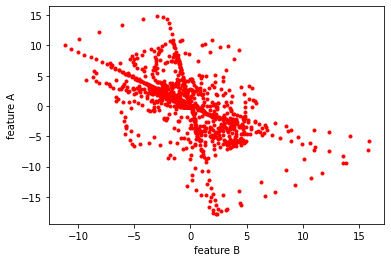

In [383]:
plot.scatter(data_bad[:,0],data_bad[:,1],c="r",marker=".")
plot.ylabel('feature A')
plot.xlabel('feature B')
#plot.savefig(path_fig+"bad_data_plot.pdf")
plot.show()

In [384]:
from sklearn.cluster import DBSCAN

In [385]:
len(df_normalized)

1058

In [386]:
def statistics (dbscan_obj):
    print(f"Outlier: {dbscan_obj.labels_.tolist().count(-1)} db.")
    print(f"Good: {dbscan_obj.labels_.tolist().count(0)} db.")


Outlier: 86 db.
Good: 972 db.


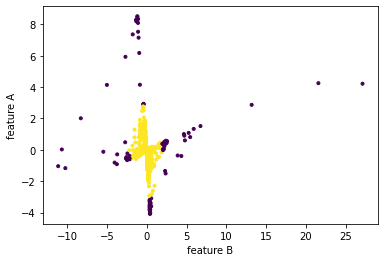

In [387]:
db_good=DBSCAN(eps=0.8,min_samples=40).fit(data)
statistics(db_good)
plot.scatter(data[:,0],data[:,1],c=db_good.labels_,marker=".")
plot.ylabel('feature A')
plot.xlabel('feature B')
plot.show()

In [388]:
def color_changer(arr):
    o=["r" if i==-1 else "g" for i in arr]
    return o

In [389]:
def plotgraf(df_in, predicted):
    xkoordinata=[i for i in range(len(df_in["0"]))]
    plot.figure(figsize=(12,6))
    col_ch=color_changer(predicted)
    plot.scatter(xkoordinata,df_in["0"],c=col_ch,marker=".",alpha=0.3)
    plot.ylabel('értékek')
    plot.xlabel('index')
    plot
    plot.show()

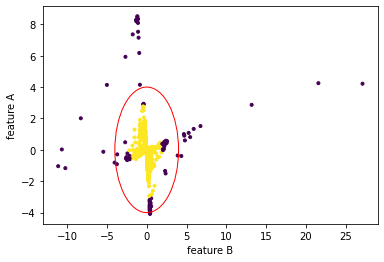

In [390]:
fig, ax = plot.subplots()
ax.scatter(data[:,0],data[:,1],c=db_good.labels_,marker=".")
circle1 = plot.Circle((0, 0), 4, color='r', fill=False)
ax.add_patch(circle1)
plot.ylabel('feature A')
plot.xlabel('feature B')
#plot.savefig(path_fig+"good_data_clastered_plot.pdf")
plot.show()

Outlier: 95 db.
Good: 963 db.


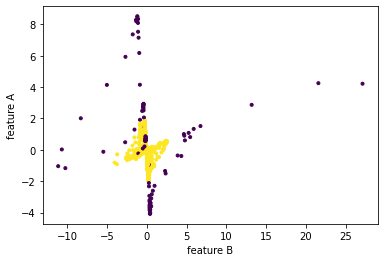

In [391]:
# figyelem itt a DBSCAN az ereseti df-ből clusterez
#-----------------------------------------||||||||||||
#-----------------------------------------vvvvvvvvvvvv

db_good=DBSCAN(eps=3.5,min_samples=20).fit(df_normalized)  # db_good=DBSCAN(eps=3.5,min_samples=20).fit(df_normalized) jó értékeket ad !!
statistics(db_good)
plot.scatter(data[:,0],data[:,1],c=db_good.labels_,marker=".")
plot.ylabel('feature A')
plot.xlabel('feature B')
plot.show()

In [392]:
# itt majd kellene csinlnuk egy classifikálót a clusterezés alapján. Holnap elmesélem mire gondoltam

# https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/



In [393]:
print(len(data))

1058


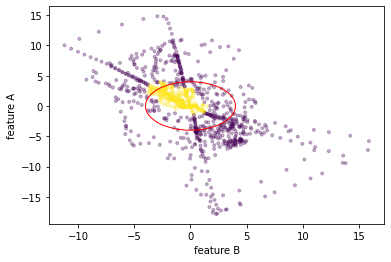

In [394]:
db_bad=DBSCAN(eps=0.8,min_samples=40).fit(data_bad)
fig, ax = plot.subplots()
ax.scatter(data_bad[:,0],data_bad[:,1],c=db_bad.labels_,marker=".",alpha=0.3)
circle1 = plot.Circle((0, 0), 4, color='r', fill=False)
ax.add_patch(circle1)
plot.ylabel('feature A')
plot.xlabel('feature B')
plot.savefig(path_fig+"bad_data_clastered_plot.pdf")
plot.show()


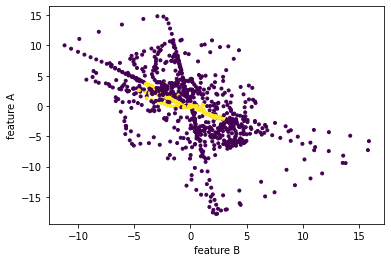

In [395]:

# Itt a dbscan az eredeti 20 dimenziós adaton fut!!!
db_bad=DBSCAN(eps=2,min_samples=60).fit(df_bad_normalized)
plot.scatter(data_bad[:,0],data_bad[:,1],c=db_bad.labels_,marker=".")
plot.ylabel('feature A')
plot.xlabel('feature B')
plot.show()

In [396]:
statistics(db_bad)

Outlier: 823 db.
Good: 445 db.


In [397]:
# -----------------------------------------

In [398]:
!pip install xgboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [399]:
#
#
# XG BOOST
#


In [400]:

from xgboost import XGBClassifier

In [401]:
X_train=df_normalized
y_train=db_good.labels_
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

In [402]:
X_test=df_bad_normalized

In [403]:
y_predict=model.predict(X_test)

In [404]:
y_predict_train=model.predict(X_train)

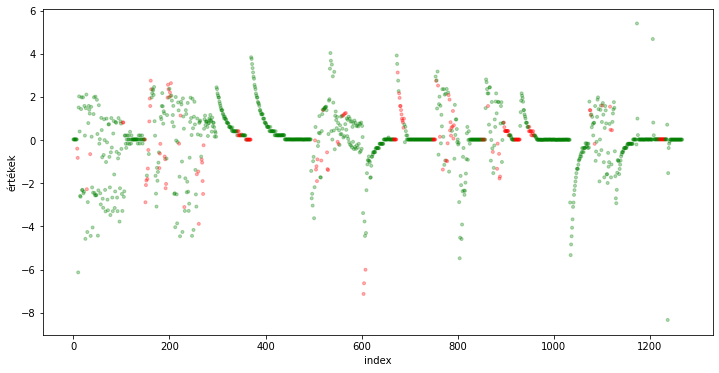

In [405]:
plotgraf(X_test,y_predict)

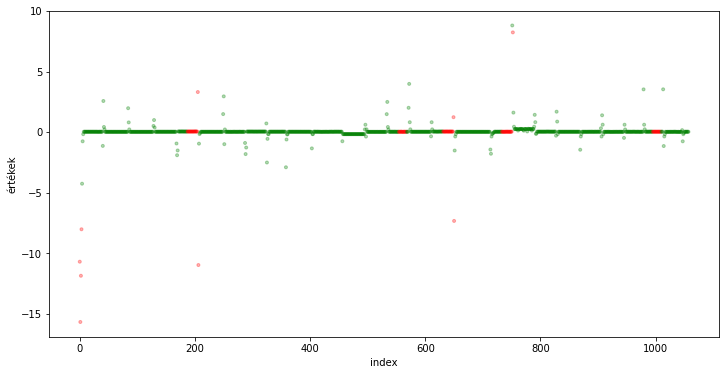

In [406]:
plotgraf(X_train,y_predict_train)

In [407]:
#ez hozza fel a grafikont a githubrol a colab virtual gépére
!wget https://raw.githubusercontent.com/sipocz/messer/main/visual_view.py

--2022-12-13 21:26:07--  https://raw.githubusercontent.com/sipocz/messer/main/visual_view.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1027 (1.0K) [text/plain]
Saving to: ‘visual_view.py.8’

visual_view.py.8    100%[===================>]   1.00K  --.-KB/s    in 0s      

2022-12-13 21:26:07 (31.5 MB/s) - ‘visual_view.py.8’ saved [1027/1027]



In [408]:
def statistics_model (obj):
    print(f"Outlier: {obj.tolist().count(-1)} db.")
    print(f"Good: {obj.tolist().count(0)} db.")


In [409]:
statistics_model(y_predict_train)

Outlier: 92 db.
Good: 966 db.


In [410]:
statistics_model(y_predict)

Outlier: 186 db.
Good: 1082 db.


In [411]:
# még volt időm néztem még egy classifiert MLP CLASSIFIER

In [412]:
from sklearn.neural_network import MLPClassifier

In [413]:
X_train=df_normalized
y_train=db_good.labels_
model_MLP = MLPClassifier(max_iter=1200)
model_MLP.fit(X_train, y_train)

MLPClassifier(max_iter=1200)

In [414]:
y_predict_train_MLP=model_MLP.predict(X_train)

In [415]:
y_predict_test_MLP=model_MLP.predict(X_test)

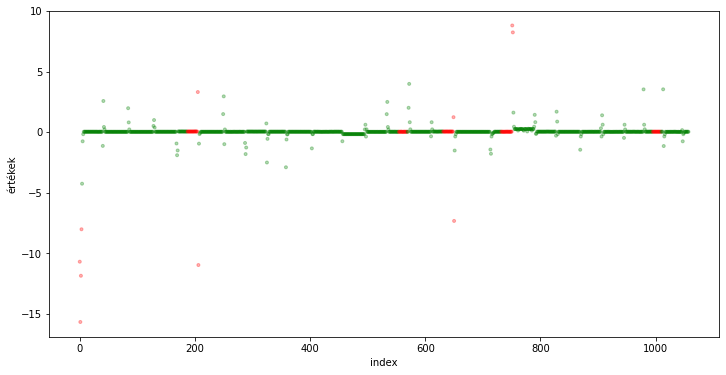

In [416]:
plotgraf(X_train,y_predict_train_MLP)

In [417]:
statistics_model(y_predict_train_MLP)

Outlier: 95 db.
Good: 963 db.


In [418]:
model_MLP.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

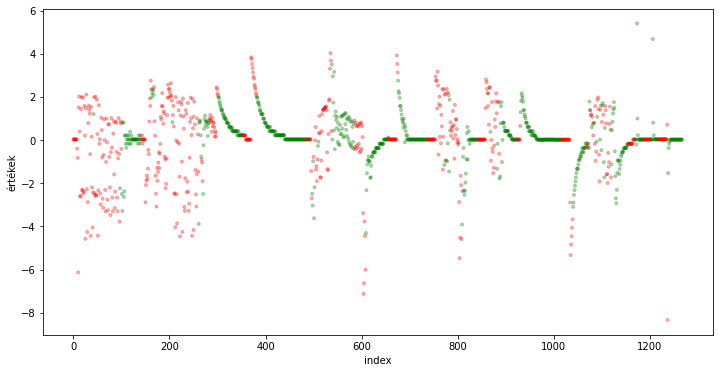

In [419]:
plotgraf(X_test,y_predict_test_MLP)

In [420]:
statistics_model(y_predict_test_MLP)

Outlier: 567 db.
Good: 701 db.


In [421]:
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessClassifier

In [422]:
model_GAUS = GaussianProcessClassifier(1.0 * RBF(1.0))

In [423]:
model_GAUS.fit(X_train, y_train)

GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1))

In [424]:
y_predict_train_GAUS=model_GAUS.predict(X_train)
y_predict_test_GAUS=model_GAUS.predict(X_test[:])

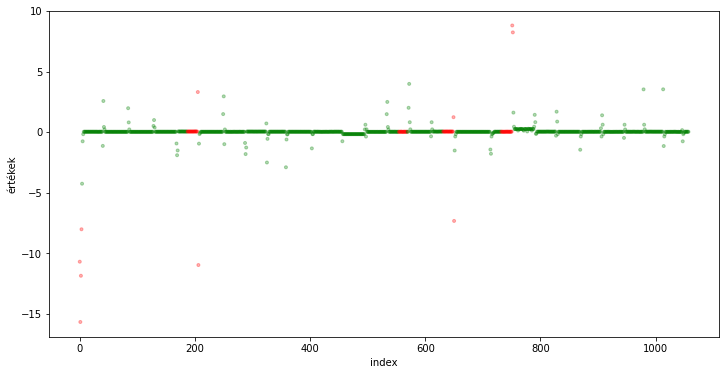

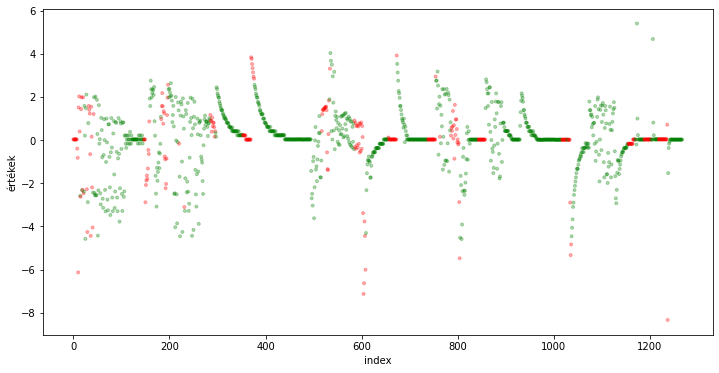

In [425]:
plotgraf(X_train,y_predict_train_GAUS)
plotgraf(X_test[:],y_predict_test_GAUS)

In [426]:
y_predict_test_GAUS

array([-1, -1, -1, ...,  0,  0,  0])

In [527]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel='poly',gamma=15, random_state=42)
X_good_kpca=kpca.fit_transform(df_normalized)

In [528]:
X_good_kpca

array([[ 1.21636189e+06, -1.83550943e+05],
       [ 6.31830966e+05,  3.29976138e+05],
       [ 1.49308047e+05,  1.40095040e+05],
       ...,
       [-1.71117474e+03, -4.65901944e+02],
       [-1.71117474e+03, -4.65901944e+02],
       [-1.71117474e+03, -4.65901944e+02]])

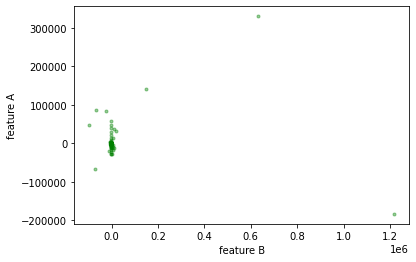

In [529]:
#db_bad=DBSCAN(eps=2,min_samples=60).fit(df_bad_normalized)
plot.scatter(X_good_kpca[:,0],X_good_kpca[:,1],c="g",marker=".",alpha=0.4)
plot.ylabel('feature A')
plot.xlabel('feature B')
plot.show()

In [530]:
X_all_kpca=kpca.fit_transform(pd.concat([df_bad_normalized,df_normalized],axis=0))
color_values1=["r" for _ in range(len(df_bad_normalized))]
color_values2=["g" for _ in range(len(df_normalized))]
color_values=color_values1+color_values2

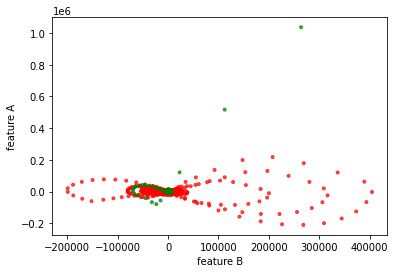

In [531]:
plot.scatter(X_all_kpca[:,0],X_all_kpca[:,1],c=color_values,marker=".",alpha=0.7)
plot.ylabel('feature A')
plot.xlabel('feature B')
plot.show()

In [532]:
#--------------------------------------------

In [533]:
error  # fusson előlröl itt meg fog állni

NameError: ignored

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=3)
data=tsne.fit_transform(df_normalized)

#data_bad = pca.transform(df_bad_normalized)


In [ ]:
plot.scatter(data[:,0],data[:,1],c="r",marker=".")
plot.ylabel('feature A')
plot.xlabel('feature B')
#plot.savefig(path_fig+"good_data_plot.pdf")
plot.show()

In [ ]:
data_bad_tSNE = tsne.fit_transform(df_bad_normalized)
plot.scatter(data_bad_tSNE[:,0],data_bad_tSNE[:,1],c="r",marker=".")
plot.ylabel('feature A')
plot.xlabel('feature B')
#plot.savefig(path_fig+"good_data_plot.pdf")
plot.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
full_df = pd.concat((df_normalized,df_bad_normalized))

In [ ]:
tsne = TSNE(n_components=2)
data_tSNE = tsne.fit_transform(full_df)
plot.scatter(data_tSNE[:,0],data_tSNE[:,1],c="r",marker=".")
plot.ylabel('feature A')
plot.xlabel('feature B')
#plot.savefig(path_fig+"good_data_plot.pdf")
plot.show()

In [ ]:
tsne = TSNE(n_components=3)
data_tSNE = tsne.fit_transform(full_df)
fig = plot.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_tSNE[:,0],data_tSNE[:,1],data_tSNE[:,2],c="r",marker=".")
#ax.scatter(data[:,0],data[:,1],data[:,2],c="r",marker=".")
ax.set_ylabel('feature A')
ax.set_xlabel('feature B')
#plot.savefig(path_fig+"good_data_plot.pdf")
plot.show()

In [ ]:
fig = plot.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(data_bad_tSNE[:,0],data_bad_tSNE[:,1],data_bad_tSNE[:,2],c="r",marker=".")
ax.scatter(data[:,0],data[:,1],data[:,2],c="r",marker=".")
ax.set_ylabel('feature A')
ax.set_xlabel('feature B')
#plot.savefig(path_fig+"good_data_plot.pdf")
plot.show()

In [ ]:
tsne.

In [ ]:


plot.plot(pca.explained_variance_ratio_)
plot.ylabel('Explained Variance')
plot.xlabel('Components')
plot.show()

In [ ]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
model.fit()



In [ ]:
def pic_gen(rangex=10000):
    for i in range(13):
        data2=pca.transform(df_normalized[i*rangex:(i+1)*rangex])
        db=DBSCAN(eps=0.3,min_samples=40).fit(data2)
        plot.scatter(data2[:,0],data2[:,1],c=db.labels_,marker=".")
        plot.ylabel('feature A')
        plot.xlabel('feature B')
        plot.show()

In [ ]:
pic_gen()

In [ ]:
def pic_gen(rangex=10000):
    
    for i in range(13):
        data2=pca.transform(df_normalized[i*rangex:(i+1)*rangex])
        db=DBSCAN(eps=0.3,min_samples=40).fit(data2)
        plot.scatter(data2[:,0],data2[:,1],c=db.labels_,marker=".")
        plot.ylabel('feature A')
        plot.xlabel('feature B')
        plot.show()
pic_gen(500)

In [ ]:
def pic_gen(rangex=10000):
    db=len(df_normalized)/rangex

    for i in range(int(db)):
        st=i*rangex
        ed=(i+1)*rangex
        print(f"{i}. {st} -- {ed} ")
        data2=pca.transform(df_normalized[st:ed])
        db=DBSCAN(eps=0.3,min_samples=40).fit(data2)
        plot.scatter(data2[:,0],data2[:,1],c=db.labels_,marker=".")
        plot.ylabel('feature A')
        plot.xlabel('feature B')
        plot.show()
pic_gen(700)

In [ ]:
pic_gen(500)